# Machine Learning - Problem Set 2
## Richard Campo in collaboration with Julia Klauss

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

### Chapter 4 - Question 5
#### (a.)
If the Bayes decision boundary is linear, then we would expect QDA to perform better on the training set because it is more flexible. However, we would expect LDA to perform better on the test set because the true decision boundary is linear, so QDA would overfit the data.

#### (b.)

If the Bayes decision boundary is non-linear, we expect QDA to perform better on the training set because it can accurately model the non-linear boundary and thus better fit the data. We also expect QDA to perform better on the test set because LDA would not accurately model the true non-linear boundary.

#### (c.)

As the sample size $n$ increases, we expect the test prediction accuracy of QDA relative to LDA to improve. This is because QDA can fit the true, likely non-linear, decision boundary more closely, resulting in lower bias than LDA. Additionally, QDA's variance will decrease as $n$ increases, alleviating concerns about the QDA model being too unstable.

#### (d.)

False. If the Bayes decision boundary is linear, then we will probably achieve a lower test error rate using LDA rather than QDA. This is because QDA will overfit the training data and add non-linearity to the boundary where none exists, so QDA will likely perform worse on the test set than LDA.

### Chapter 4 - Question 6

Our estimated model is: $$\ln\left(\frac{\hat{p}(X)}{1-\hat{p}(X)}\right) = -6 + 0.05 X_1 + 1 X_2$$

#### (a.)

The estimated probability that a student who studies for 40 hours a week and has an undergrad GPA of 3.5 will receive an A is:

$$\hat{p}(X) = \frac{\exp(-6 + 0.05(40) + 1(3.5))}{1 + \exp(-6 + 0.05(40) + 1(3.5))} = 0.3775$$

or about 37.5%.

#### (b.)

To have a 50% chance of getting an A, the student would need to study:

$$0.50 = \frac{\exp(-6 + 0.05(X_1) + 1(3.5))}{1 + \exp(-6 + 0.05(X_1) + 1(3.5))}$$
$$0.5 = \frac{\exp(0.05(X_1) - 2.5)}{1 + \exp(0.05(X_1) - 2.5)}$$
$$0.5 + 0.5(\exp(0.05(X_1) - 2.5)) = \exp(0.05(X_1) - 2.5)$$
$$0.5 = 1\exp(0.05(X_1) - 2.5) - 0.5(\exp(0.05(X_1) - 2.5))$$
$$0.5 = 0.5(\exp(0.05(X_1) - 2.5))$$
$$1 = \exp(0.05(X_1) - 2.5)$$
$$\ln(1) = 0.05(X_1) - 2.5$$
$$0 = 0.05(X_1) - 2.5$$
$$2.5 = 0.05(X_1)$$
$$ X_1 = 50$$
or 50 hours.

### Chapter 5: Question 7

Given:
- $\bar{X} = 10$ is the mean value of X for comapnies that issued a dividend
- $\bar{X} = 0$ is the mean value of X for companies that did not issue a dividend
- $\sigma^2 = 36$ is the variance of X for both types of companies
- Pr(Y=1) = 0.80 is the proportion of companies that issued a dividend, which we can think of as a probability

We want to find the probability that a company issued a dividend given its X value was 4, or Pr(D|X).

Bayes' Theorem states:
$$\Pr(Y=1|X) = \frac{\Pr(X|Y=1)\Pr(Y=1)}{\Pr(X)}$$

We can calculate Pr(X|Y=1) using the normal density function:
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$
$$Pr(X|Y=1) = \frac{1}{\sqrt{2\pi(36)}} e^{-\frac{(4 - 10)^2}{2 \cdot 36}}$$
$$Pr(X|Y=1) = \frac{1}{\sqrt{72\pi}} e^{-\frac{(-6)^2}{72}}$$
$$Pr(X|Y=1) = \frac{1}{6\sqrt{2\pi}} e^{-\frac{36}{72}}$$
$$Pr(X|Y=1) = \frac{1}{6\sqrt{2\pi}} e^{-\frac{1}{2}}$$
$$Pr(X|Y=1) = \frac{1}{6\sqrt{2e\pi}}$$
$$Pr(X|Y=1) \approx 0.040 $$

Next we need to calculate Pr(X) using the Law of Iterated Expectations:
$$\Pr(X) = \Pr(X|Y=1) \cdot \Pr(Y=1) + \Pr(X|Y=0) \cdot \Pr(Y=0)$$
$$\Pr(X) = (0.040)(0.8) + \frac{1}{\sqrt{2\pi(36)}} e^{-\frac{(4 - 0)^2}{2 \cdot 36}} \cdot 0.2$$
$$\Pr(X) = 0.032 +  \frac{1}{6\sqrt{2\pi}} e^{-\frac{16}{72}} \cdot 0.2$$
$$\Pr(X) = 0.032 +  \frac{1}{30\sqrt{2\pi}} e^{-\frac{2}{9}}$$
$$\Pr(X) \approx 0.043$$

Then we can plug into Bayes' Theorem:
$$\Pr(Y=1|X) = \frac{(0.040)(0.80)}{0.043}$$
$$\Pr(Y=1|X) \approx 74\%$$

Thus, we predict that a company with a value of X = 4 will issue a dividend about 74% of the time.

### Chapter 4: Question 14
#### (a.)

In [119]:
df_auto = pd.read_csv("Data-Auto.csv", index_col=0)

df_auto["mpg01"] = np.where(df_auto["mpg"] > df_auto["mpg"].median(), 1, 0)

#### (b.)

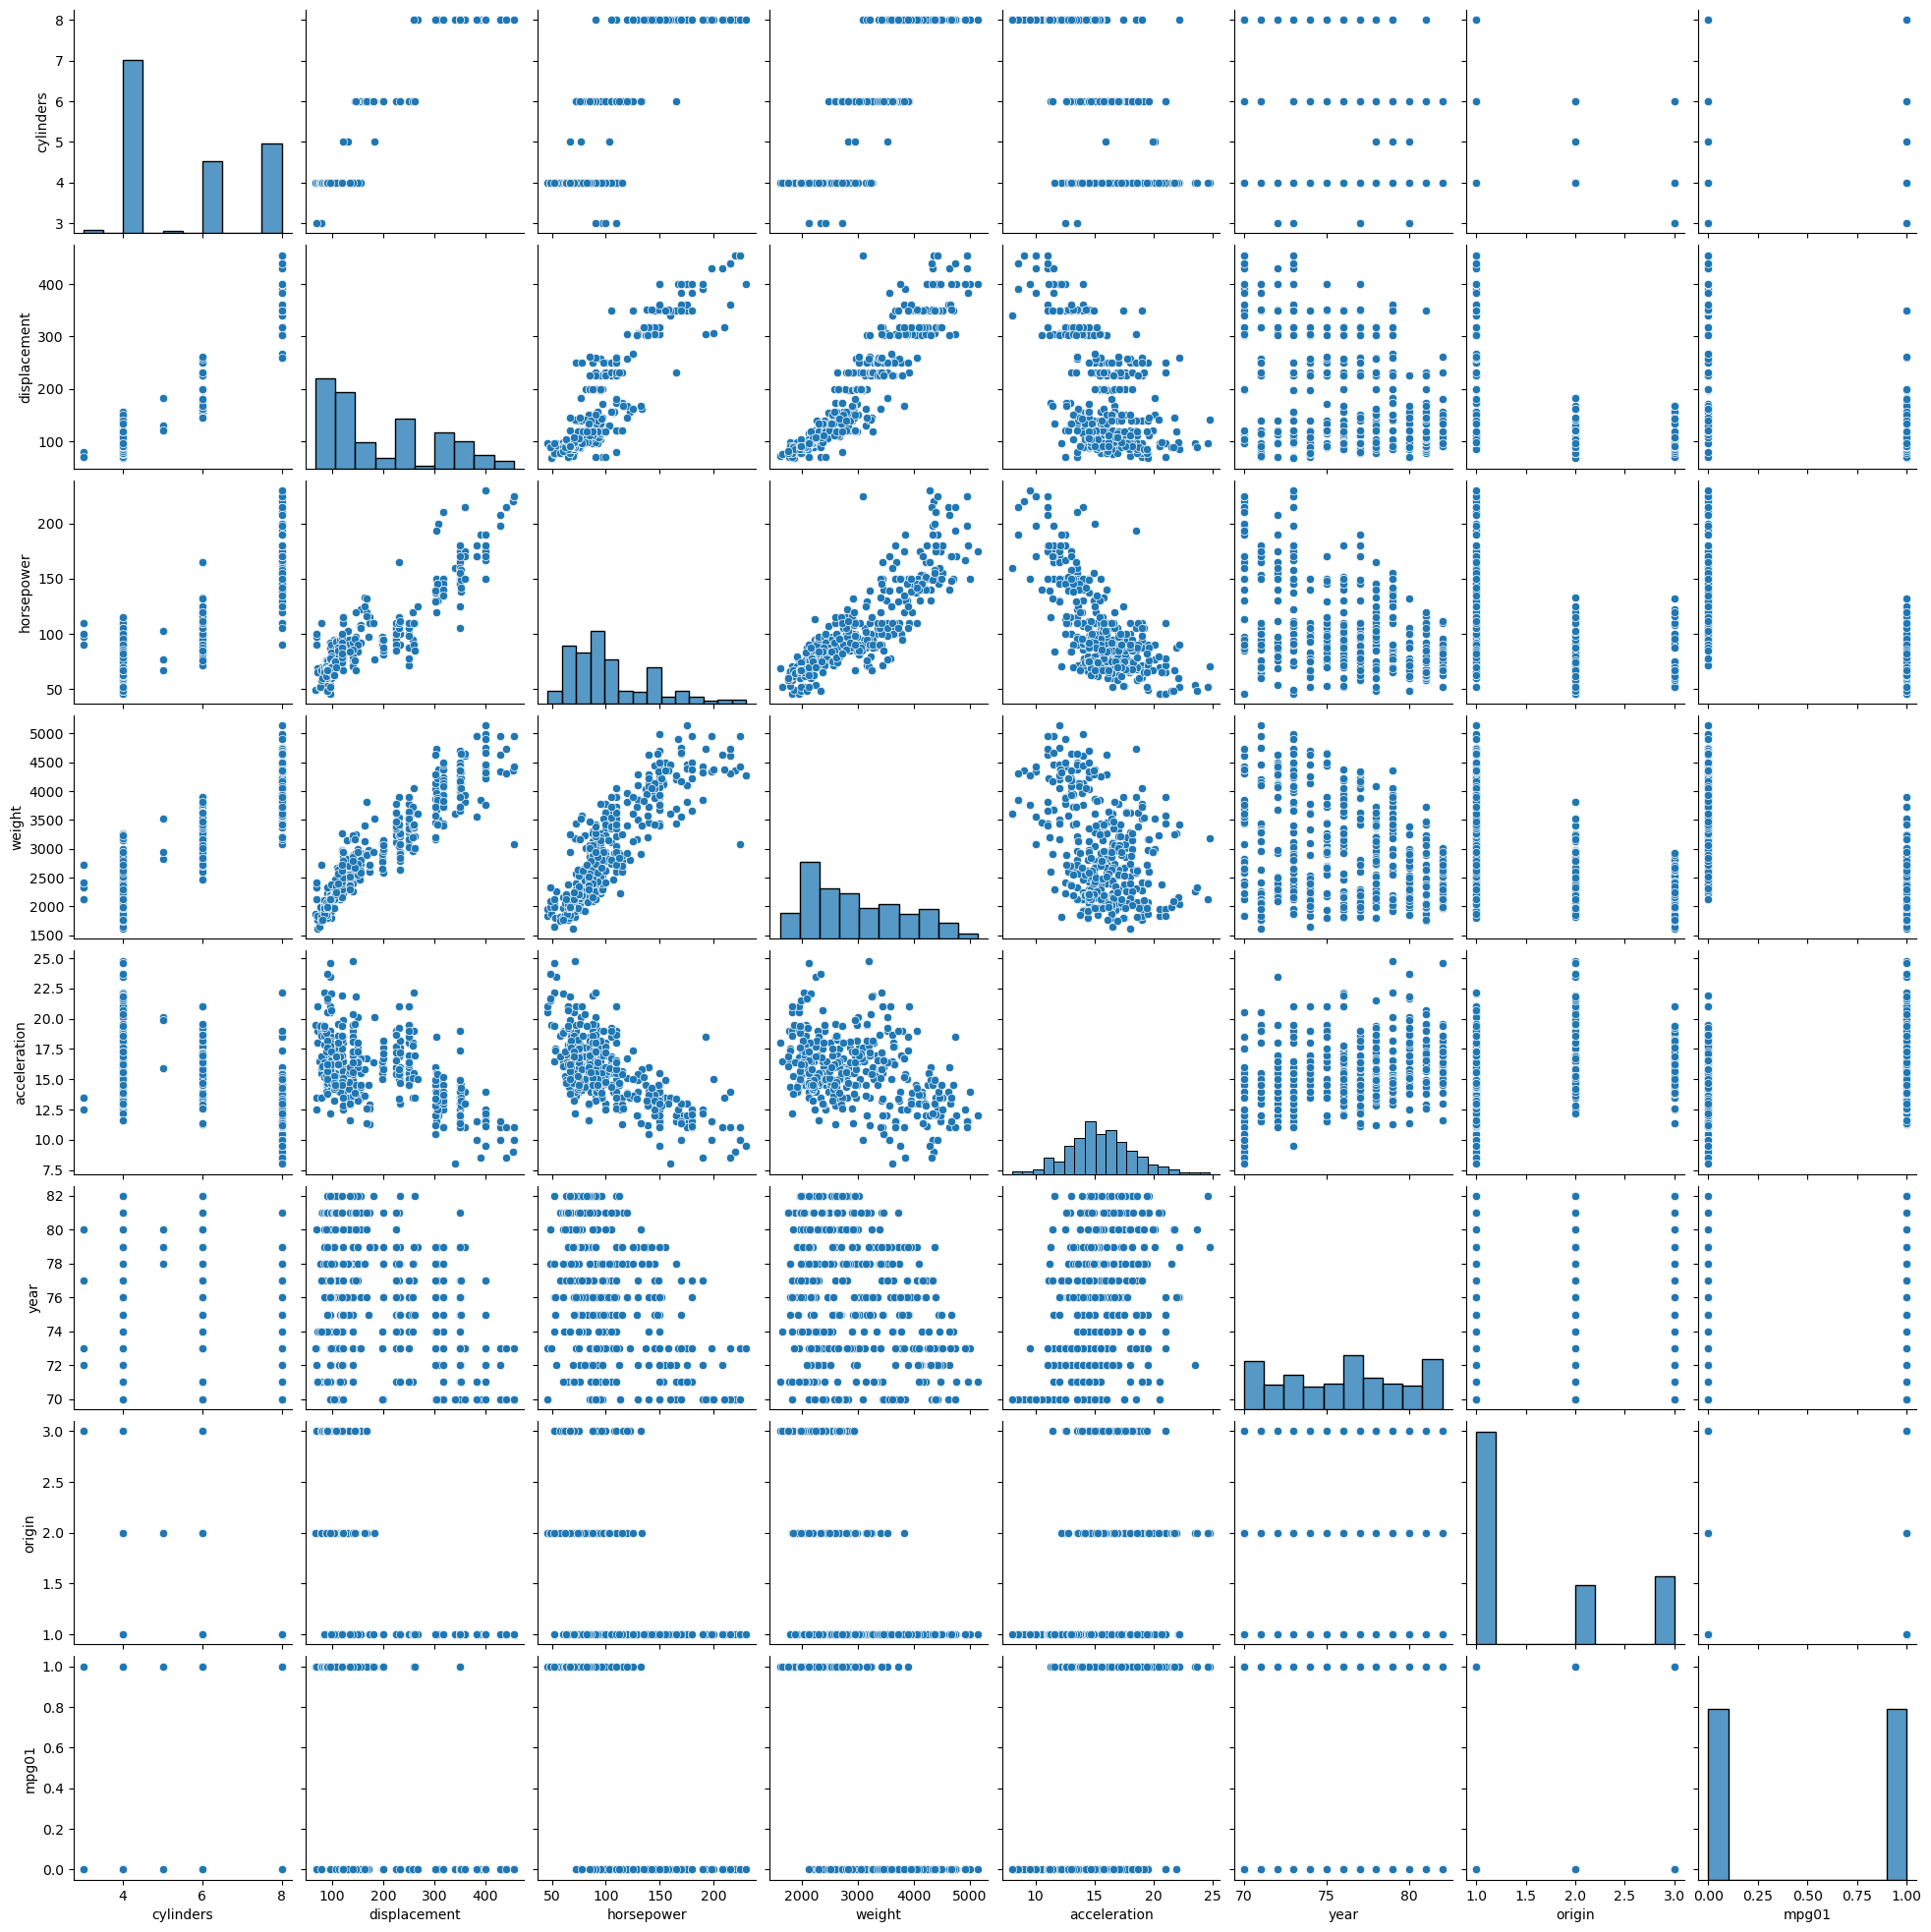

In [120]:
sns.pairplot(df_auto.drop("mpg", axis=1))

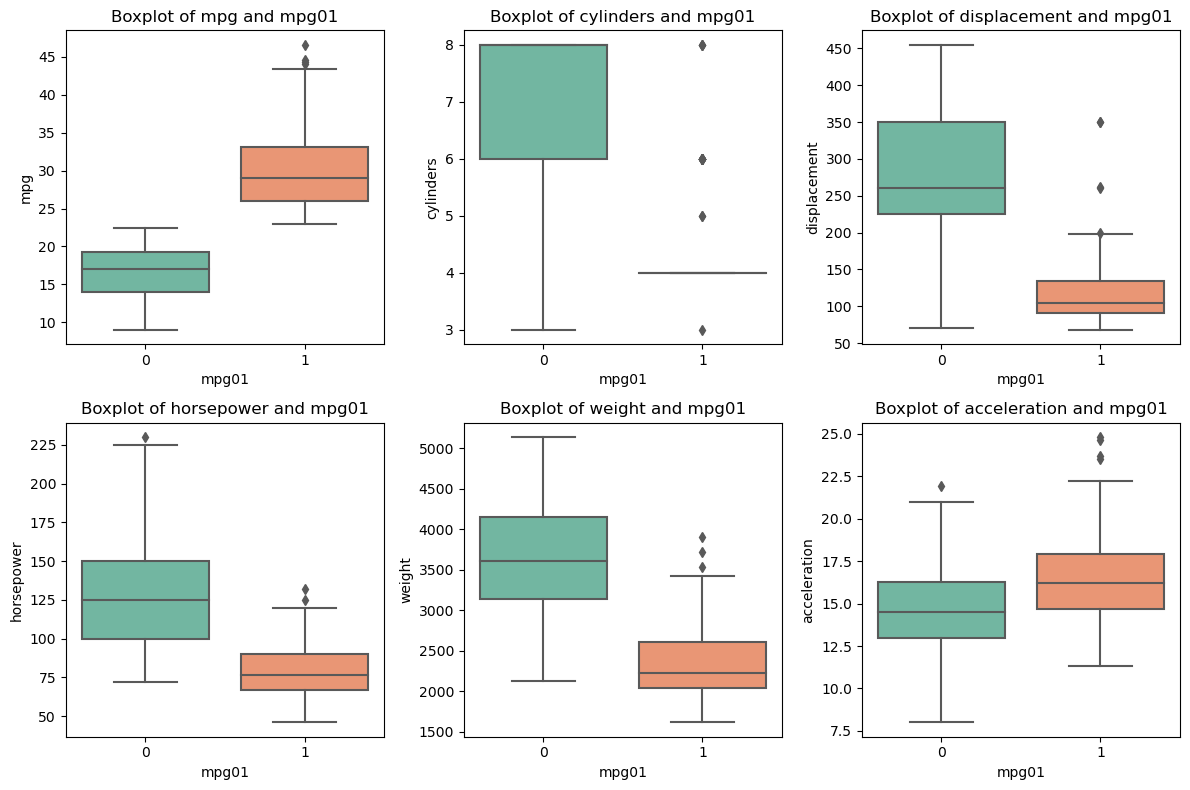

In [121]:
numerical_columns = df_auto.drop("name", axis=1).columns

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes = axes.flatten()

for predictor, ax in zip(numerical_columns, axes):
    sns.boxplot(x="mpg01", y=predictor, data=df_auto, palette="Set2", ax=ax)
    ax.set_title(f"Boxplot of {predictor} and mpg01")

fig.tight_layout()
plt.show()


We can see from the boxplots especially that high mpg cars tend to have four cylinders, low displacement, low horsepower, low weight, and slightly higher acceleration on average. The number of cylinders looks like an especially good predictor since it looks like almost all high mpg cars have four cylinders while low mpg cars typically have six to eight cylinders. For the same reason, displacement also looks like a good predictor since high mpg cars tend to have displacement values of about 100 to 150, while low mpg cars tend to have much higher displacement in the 200 to 350 range. Horsepower and weight also look like good predictors since there is not much overlap between the high mpg and low mpg distributions. Acceleration looks like the poorest predictor since high mpg cars have slightly higher acceleration on average, but there is a lot of overlap.

Also, of course, mpg perfectly predicts mpg01 since mpg01 is derived from mpg.

#### (c.)

In [122]:
X = df_auto.drop(["mpg01"], axis = 1)
y = df_auto["mpg01"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=22
    )

#### (d.)

In [123]:
# Leaving out acceleration and name since the question says to only use 
# variables most associated with mpg01
X_train_best = X_train.drop(["name", "acceleration"], axis=1)
X_test_best = X_test.drop(["name", "acceleration"], axis=1)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_best, y_train)

y_pred = lda_model.predict(X_test_best)

accuracy = accuracy_score(y_test, y_pred)
print("LDA accuracy: ", round(accuracy, 5))
print("LDA test error: ", round(1 - accuracy, 5))

LDA accuracy:  0.92347
LDA test error:  0.07653


The test accuracy of this LDA model is about 92.3%, so its test error is about 7.7%.

#### (e.)

In [124]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_best, y_train)

y_pred = qda_model.predict(X_test_best)

accuracy = accuracy_score(y_test, y_pred)
print("QDA accuracy: ", round(accuracy, 4))
print("QDA test error: ", round(1 - accuracy, 4))

QDA accuracy:  0.9286
QDA test error:  0.0714


The accuracy of the QDA model is about 92.9%, so its test error is about 7.1%. The LDA and QDA models performa about the same, suggesting the Bayes decision boundary is only slightly nonlinear.

#### (f.)

In [125]:
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train_best, y_train)

y_pred = logit_model.predict(X_test_best)

accuracy = accuracy_score(y_test, y_pred)
print("Logit accuracy: ", round(accuracy, 4))
print("Logit test error: ", round(1 - accuracy, 4))

Logit accuracy:  0.9949
Logit test error:  0.0051


The accuracy of the logistic regression model is about 99.5%, so the test error is about 0.5%. Since the logistic regression model is more accurate than LDA and QDA, this suggests that the assumptions of LDA are not met.

#### (g.)

In [126]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_best, y_train)

y_pred = gnb_model.predict(X_test_best)

accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes accuracy: ", round(accuracy, 4))
print("Naive Bayes test error: ", round(1 - accuracy, 4))

Naive Bayes accuracy:  0.9082
Naive Bayes test error:  0.0918


The accuracy of the Naive Bayes model is about 90.8%, meaning the test error is about 9.2%. Since we don't have many predictors, Naive Bayes is not the best choice of model.

### Chapter 5: Question 5
#### (a.)

In [136]:
df_default = pd.read_csv("Data-Default.csv")

array(['No', 'Yes'], dtype=object)

In [128]:
X = df_default[["balance", "income"]]
y = df_default["default"].astype('category').cat.codes

logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X, y)

LogisticRegression(max_iter=1000)

#### (b.)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    )

logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

y_pred = logit_model.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred)
print("Logit accuracy: ", round(accuracy, 4))
print("Logit test error: ", round(1 - accuracy, 4))

Logit accuracy:  0.9683
Logit test error:  0.0317


The logistic regression model has an accuracy of 96.8%, so the model has a test error rate of 3.2%.

#### (c.)

In [130]:
random_states = [2, 6, 9]

for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)

    logit_model = LogisticRegression(max_iter=1000)
    logit_model.fit(X_train, y_train)

    y_pred = logit_model.predict_proba(X_test)[:, 1]
    y_pred = np.where(y_pred > 0.5, 1, 0)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"State {state} accuracy: ", round(accuracy, 4))
    print(f"State {state} test error: ", round(1 - accuracy, 4), "\n")

State 2 accuracy:  0.9763
State 2 test error:  0.0237 

State 6 accuracy:  0.9753
State 6 test error:  0.0247 

State 9 accuracy:  0.9693
State 9 test error:  0.0307 



Using different validation sets, we still get similar results of about a 2-3% test error rate. This is good since it means the original test error rate we calculated of 3.2% did not come from an imbalance in the proportion of defaults between the training and test groups.

#### (d.)

In [138]:
df_default["student"] = np.where(df_default["student"] == "No", 0, 1)

X = df_default.drop("default", axis=1)
y = df_default["default"].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    )

logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

y_pred = logit_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logit with student accuracy: ", round(accuracy, 4))
print(f"Logit with student test error: ", round(1 - accuracy, 4))

Logit with student accuracy:  0.9733
Logit with student test error:  0.0267


Now that we've added whether an observation is a student or not as a predictor, our model is a little but more accurate. Our test error decreased from about 3.2% to about 2.7%. This makes sense since our model now has more information to make preictions with.